In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# World Happiness Report

## Variáveis
- GDP - Gross Domestic Product (o valor de todos os bens e servicos um pais
produz no ano)  
**The extent to which GDP contributes to the calculation of the Happiness Score.**
- Social Support - Sim ou não (Pergunta: Se estivesse em problemas, você tem
amigos ou família nos quais você pode contar) e fazem uma média
- Health Expectancy - Calculado pela WHO (pesquisar)
- Freedom to make choices - Sim ou Não
- Generosity - Sim ou Não (Pergunta: Você doou dinheiro no ultimo ano
- Corrupção - Sim ou Não - Duas perguntas (Tem corrupção no governo. Tem
corrupção nas empresas)
- Score - Somatória das variáveis

## Objetivos

- Fazer uma análise exploratória de dados através dos anos 2015 até 2019.
- Para responder as perguntas:
    - Quais foram as alterações ano a ano no ranking dos primeiros 10 países.
    - Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a
    ano.(Sem contar o score ou ranking)
    - Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GPD.
    - Qual foi o país que mais subiu no ranking no período inteiro analisado.
    - Teve países que saíram ou entraram do index.
    - Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa.
    - 2 questões extras que vocês acham interessante analisar

In [2]:
dfs = {
    "2015": pd.read_csv("dados/2015.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2016": pd.read_csv("dados/2016.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2017": pd.read_csv("dados/2017.csv", index_col="Country", usecols=["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption."]),
    "2018": pd.read_csv("dados/2018.csv", index_col="Country or region", usecols=["Country or region","Overall rank","Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]),
    "2019": pd.read_csv("dados/2019.csv", index_col="Country or region", usecols=["Country or region","Overall rank", 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Generosity'])
}

In [3]:
renames = {
    'Northern Cyprus': 'North Cyprus',
    'Hong Kong': 'Hong Kong S.A.R., China',
    'Somaliland region': 'Somaliland Region',
    'Taiwan': 'Taiwan Province of China',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'North Macedonia': 'Macedonia',
}
for year in range(2015, 2020):
    dfs[str(year)] = dfs[str(year)].rename(index=renames)

In [4]:
# Renaming Columns
dfs["2015"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2016"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2017"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2018"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
dfs["2019"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

In [5]:
dfs["2015"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.1+ KB


In [6]:
dfs["2016"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 157 non-null    int64  
 1   Happiness Score                157 non-null    float64
 2   Economy (GDP per Capita)       157 non-null    float64
 3   Family                         157 non-null    float64
 4   Health (Life Expectancy)       157 non-null    float64
 5   Freedom                        157 non-null    float64
 6   Trust (Government Corruption)  157 non-null    float64
 7   Generosity                     157 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.0+ KB


In [7]:
dfs["2017"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 155 non-null    int64  
 1   Happiness Score                155 non-null    float64
 2   Economy (GDP per Capita)       155 non-null    float64
 3   Family                         155 non-null    float64
 4   Health (Life Expectancy)       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Trust (Government Corruption)  155 non-null    float64
 7   Generosity                     155 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 10.9+ KB


In [8]:
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.0+ KB


In [9]:
list_trusts = [dfs["2017"]["Trust (Government Corruption)"], dfs["2019"]["Trust (Government Corruption)"]]
df_trusts = pd.concat(list_trusts, axis=1)
# df_trusts["mean"] = df_trusts.mean(axis=1)
# df_trusts
mean_trust_2017_2019 = df_trusts.loc["United Arab Emirates"].mean()
dfs["2018"].loc["United Arab Emirates", "Trust (Government Corruption)"] = mean_trust_2017_2019
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.0+ KB


In [10]:
dfs["2019"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to South Sudan
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.0+ KB


In [11]:
ranks = [
    dfs["2015"]["Happiness Rank"].nsmallest(10),
    dfs["2016"]["Happiness Rank"].nsmallest(10),
    dfs["2017"]["Happiness Rank"].nsmallest(10),
    dfs["2018"]["Happiness Rank"].nsmallest(10),
    dfs["2019"]["Happiness Rank"].nsmallest(10),
]
df_ranks = pd.concat(ranks, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_ranks

,2015,2016,2017,2018,2019
Switzerland,1.0,2.0,4.0,5.0,6.0
Iceland,2.0,3.0,3.0,4.0,4.0
Denmark,3.0,1.0,2.0,3.0,2.0
Norway,4.0,4.0,1.0,2.0,3.0
Canada,5.0,6.0,7.0,7.0,9.0
Finland,6.0,5.0,5.0,1.0,1.0
Netherlands,7.0,7.0,6.0,6.0,5.0
Sweden,8.0,10.0,9.0,9.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0
Australia,10.0,9.0,10.0,10.0,NaN


<AxesSubplot:>

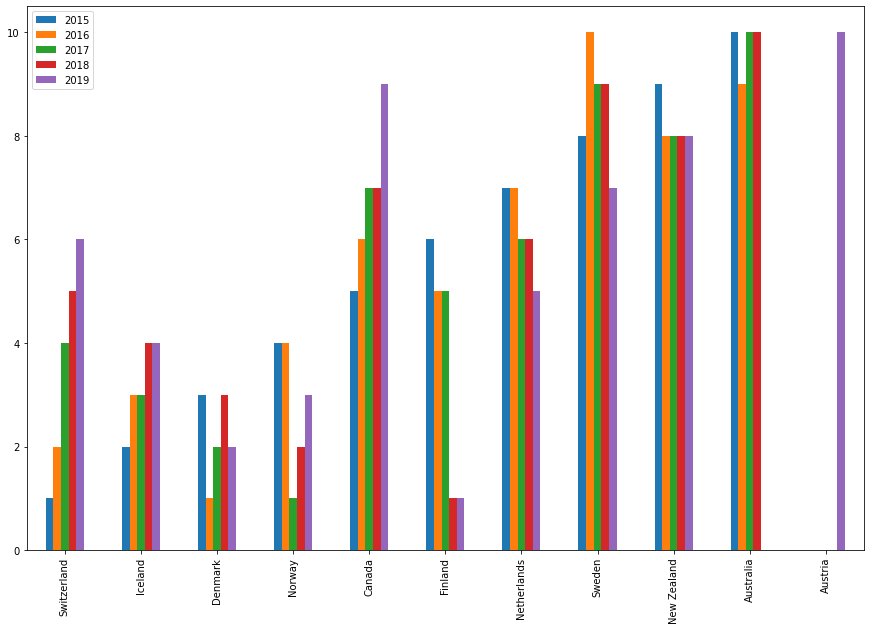

In [12]:
# fig, ax = plt.subplots(figsize=(15, 10))
# for (index, values) in df_ranks.iterrows():
#     ax.plot(values.index, values, label=index)
# ax.legend()
# ax.invert_yaxis()

# plt.show()
df_ranks.plot(kind="bar", figsize=(15, 10))

Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano. (Sem contar o score ou ranking)

GDP, Social Support, Health Expectancy, Freedom, Generosity, Corrupção, Score

•	GDP - Gross Domestic Product (o valor de todos os bens e serviços que um país produz no ano)

•	Social Support - Sim ou não (Pergunta: Se estivesse em problemas, você tem amigos ou família nos quais você pode contar) e fazem uma média (1 e 0)

•	Health Expectancy - Calculado pela WHO (pesquisar)

•	Freedom to make choices - Sim ou Não

•	Generosity - Sim ou Não (Pergunta: Você doou dinheiro no último ano)

•	Corrupção - Sim ou Não - Duas perguntas (Tem corrupção no governo. Tem corrupção nas empresas) *ver se é média
•	Score - Somatória das variáveis 


In [13]:
means = []
for year in dfs:
    means.append(dfs[year].describe().loc["mean"])

df_means = pd.concat(means, axis=1)
df_means.columns = ["2015", "2016", "2017", "2018", "2019"]
df_means_describe = df_means.T.describe().T
df_means_describe["delta"] = df_means_describe["max"] - df_means_describe["min"]
df_means_describe.sort_values("delta", ascending=False, inplace=True)
df_means_describe.drop(["Happiness Rank", "Happiness Score"], inplace=True)
df_means_describe.iloc[:3]

,count,mean,std,min,25%,50%,75%,max,delta
Family,5.0,1.079123,0.184476,0.793621,0.991046,1.188898,1.208814,1.213237,0.419616
Health (Life Expectancy),5.0,0.612362,0.070726,0.551341,0.557619,0.597346,0.630259,0.725244,0.173903
Economy (GDP per Capita),5.0,0.916266,0.054217,0.846137,0.891449,0.905147,0.953880,0.984718,0.138581


- Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GDP.


In [14]:
gdps = [
    dfs["2015"]["Economy (GDP per Capita)"],
    dfs["2016"]["Economy (GDP per Capita)"],
    dfs["2017"]["Economy (GDP per Capita)"],
    dfs["2018"]["Economy (GDP per Capita)"],
    dfs["2019"]["Economy (GDP per Capita)"],
]
df_gdps = pd.concat(gdps, axis=1)
df_gdps.columns = ["2015", "2016", "2017", "2018", "2019"]
df_gdps.replace(0, np.nan, inplace=True)
df_gdps["2015 a 2016 (%)"] = (df_gdps["2016"]/df_gdps["2015"] - 1)*100
df_gdps["2016 a 2017 (%)"] = (df_gdps["2017"]/df_gdps["2016"] - 1)*100
df_gdps["2017 a 2018 (%)"] = (df_gdps["2018"]/df_gdps["2017"] - 1)*100
df_gdps["2018 a 2019 (%)"] = (df_gdps["2019"]/df_gdps["2018"] - 1)*100
df_gdps = df_gdps.reset_index()
df_gdps = pd.melt(df_gdps,  id_vars=['index'], value_vars=['2015 a 2016 (%)', '2016 a 2017 (%)','2017 a 2018 (%)','2018 a 2019 (%)'])
df_gdps.columns = ["Country", "Year", "Delta GDP (%)"]
display(df_gdps.nlargest(3, 'Delta GDP (%)'))
display(df_gdps.nsmallest(3, 'Delta GDP (%)'))

,Country,Year,Delta GDP (%)
130,Malawi,2015 a 2016 (%),442.955112
156,Burundi,2015 a 2016 (%),346.470588
294,Malawi,2016 a 2017 (%),168.046892


,Country,Year,Delta GDP (%)
648,Burundi,2018 a 2019 (%),-49.450549
443,Liberia,2017 a 2018 (%),-36.156876
627,Yemen,2018 a 2019 (%),-35.067873


- Qual foi o país que mais subiu no ranking no período inteiro analisado.


In [15]:
rankings = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(rankings, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_ranks.dropna(inplace=True)
df_ranks["Delta"] = df_ranks["2015"] - df_ranks["2019"]
df_ranks.sort_values(by="Delta", ascending=False, inplace=True)
df_ranks.head()

,2015,2016,2017,2018,2019,Delta
Benin,155.0,153.0,143.0,136.0,102.0,53.0
Ivory Coast,151.0,139.0,128.0,107.0,99.0,52.0
Honduras,105.0,104.0,91.0,72.0,59.0,46.0
Hungary,104.0,91.0,75.0,69.0,62.0,42.0
Gabon,143.0,134.0,118.0,103.0,104.0,39.0


- Teve países que saíram ou entraram do index.


In [16]:
rankings = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(rankings, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_entraram_sairam = df_ranks[df_ranks.isna().any(axis=1)]
print(f"{len(df_entraram_sairam)} countries entered and left the rankings")
df_entraram_sairam

18 countries entered and left the rankings


,2015,2016,2017,2018,2019
Oman,22.0,NaN,NaN,NaN,NaN
Suriname,40.0,40.0,NaN,NaN,NaN
Somaliland Region,91.0,97.0,NaN,NaN,NaN
Mozambique,94.0,NaN,113.0,123.0,123.0
Lesotho,97.0,NaN,139.0,141.0,144.0
Laos,99.0,102.0,NaN,110.0,105.0
Swaziland,101.0,NaN,NaN,NaN,135.0
Sudan,118.0,133.0,130.0,137.0,NaN
Djibouti,126.0,NaN,NaN,NaN,NaN
Angola,137.0,141.0,140.0,142.0,NaN


- Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa.


In [17]:
healths = [
    dfs["2015"]["Health (Life Expectancy)"],
    dfs["2016"]["Health (Life Expectancy)"],
    dfs["2017"]["Health (Life Expectancy)"],
    dfs["2018"]["Health (Life Expectancy)"],
    dfs["2019"]["Health (Life Expectancy)"],
]
df_health = pd.concat(gdps, axis=1)
df_health.columns = ["2015", "2016", "2017", "2018", "2019"]
df_health.replace(0, np.nan, inplace=True)
df_health["2015 a 2016 (%)"] = (df_health["2016"]/df_health["2015"] - 1)*100
df_health["2016 a 2017 (%)"] = (df_health["2017"]/df_health["2016"] - 1)*100
df_health["2017 a 2018 (%)"] = (df_health["2018"]/df_health["2017"] - 1)*100
df_health["2018 a 2019 (%)"] = (df_health["2019"]/df_health["2018"] - 1)*100
df_health = df_health.reset_index()
df_health = pd.melt(df_health,  id_vars=['index'], value_vars=['2015 a 2016 (%)', '2016 a 2017 (%)','2017 a 2018 (%)','2018 a 2019 (%)'])
df_health.columns = ["Country", "Year", "Health (%)"]
display(df_health.nlargest(3, 'Health (%)'))
display(df_health.nsmallest(3, 'Health (%)'))

,Country,Year,Health (%)
130,Malawi,2015 a 2016 (%),442.955112
156,Burundi,2015 a 2016 (%),346.470588
294,Malawi,2016 a 2017 (%),168.046892


,Country,Year,Health (%)
648,Burundi,2018 a 2019 (%),-49.450549
443,Liberia,2017 a 2018 (%),-36.156876
627,Yemen,2018 a 2019 (%),-35.067873


- 2 questões extras que vocês acham interessante analisar

<AxesSubplot:>

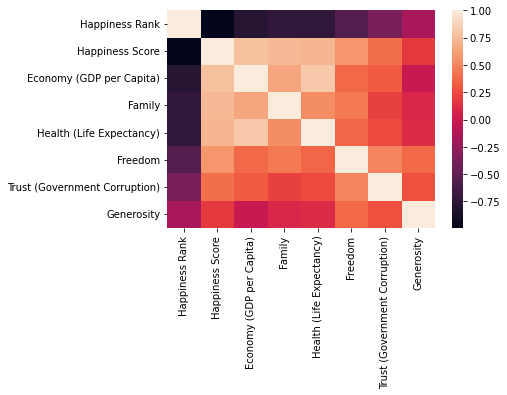

In [18]:
import seaborn as sns
corr = dfs["2015"].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)